# Project: Post Disaster Sentiment Analysis 
## Nick Giorgio & Leila Moinpour

### Research Questions: 
#### 1. How does public sentiment evolve over the course of a natural disaster and its recovery? What emotions are most commonly expressed by affected communities in the aftermath of a disaster ? (Timeline & Change in Sentiments on Social Media) 

#### 2. Are there significant differences in sentiment based on location or disaster type like a Fire vs Hurricane vs Earthquake in just USA (scoped to this for english speaking focus + similar policies across nation) Scope the severity of the disaster re: losses/damages roughly the same? We will look a these data sets in more detail and then decide if we want to broaden the scope to compare between types 



### Data: 
#### 1. Crisis NLP has data from wildfires including annotated tweets from 2018 California Wildfires (we can select a few events here? – need to check if the information is all in english for international events) 

#### 2. Twitter Sentiment Dataset has dataset of around 50,000 disaster related tweets with sentiment polarity

#### 3. Hurricane Laura (2020) has a publicly available Twitter dataset with over 1 million tweets regarding the disaster. It was collected with a Twitter API and includes raw tweet JSON data. Each tweet includes text, timestamp, and available geolocation/ place tags.




In [5]:
import pandas as pd
from textblob import TextBlob
import nltk
nltk.download('sentiwordnet')
nltk.download('wordnet')

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Testing Senitment  function

In [2]:
sentence = TextBlob('So mad the fires have disctroyed so many homes.))')
print(sentence.sentiment)

Sentiment(polarity=-0.0625, subjectivity=0.75)


## Loading Data containing Tweets from the 2018 Californian Wild Fires

In [6]:
wildfire = pd.read_csv('2018Wildfires_Summary (1).csv')
wildfire.head(20)

,num,text,timestamp,label
0,1831,\n\nEntertainment Tonight: Dave Grohl Deliver...,43418.55139,1
1,915,Residents are oftentimes left no choice but...,43318.62153,1
2,971,HEADLINES BLAME THIS ON ‚ÄúWILDFIRE‚Äù ‚Äî\n...,43427.82917,1
3,804,‚ÄúAlmost 200 Australian and NZ firefighters ...,43315.81181,1
4,1299,‚ÄúPolice arrest suspect for setting off mass...,43321.93889,1
5,740,#CampFire Evacuation Underway\nEvacuation War...,43412.74028,1
6,828,#HolyFire #CarrFire #MendocinoComplexFire\n#C...,43323.43472,1
7,1718,#Malibu surfers banded together to bring supp...,43420.05208,1
8,1780,"#Malibu, just grab your pets and get OUT. Tur...",43413.78681,1
9,1236,#Tips On What To Do If You Become Trapped By ...,43323.38889,1


## Going through each text column and calculating its sentiment score using Textblob

In [9]:
ca_sentiment = []
for c in wildfire['text']:
    ca_sentiment.append(TextBlob(c).sentiment.polarity)

for i in range(20):
    print("Sentiment:", round(ca_sentiment[i], 2), "Comment:", wildfire['text'].iloc[i])

Sentiment: 0.25 Comment:  

Entertainment Tonight: Dave Grohl Delivers Food to First Responders Fighting California Wildfires.
https://www.etonline.com/dave-grohl-delivers-food-to-first-responders-fighting-california-wildfires-113719¬†‚Ä¶

via @GoogleNews
Sentiment: -0.1 Comment:    Residents are oftentimes left no choice but to leave their animals behind when wildfires strike.  We not only protect human lives and property, but animals as well.  Firefighters ensured that there is plenty of food and water until residents can return to their homes. pic.twitter.com/dSrKXOcNrR
Sentiment: 0.09 Comment:   HEADLINES BLAME THIS ON ‚ÄúWILDFIRE‚Äù ‚Äî
BUT LOOKS LIKE CRIME AGAINST HUMANITY
 Buildings obliterated
 Cars melted
 Surrounding trees intact
 84 confirmed dead
 > 560 missing
 Residents warned against returning
 Area rich in gold & diamonds
https://www.buttecounty.net/News-Announcements/ArtMID/3464/ArticleID/1286/Health-Officer-Issues-Hazard-Advisory-Warning-Against-Habitation-of-Destroye

## Cleaning up the text in the "text" column of the wildfire DataFrame by removing links, usernames, hashtags, special characters, and extra spaces, and then saving the cleaned version in a new column called cleaned_text

In [10]:
import re

def clean_text(text):
    text = re.sub(r'http\S+|www\S+|pic\.twitter\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
wildfire['cleaned_text'] = wildfire['text'].apply(clean_text)

In [13]:
for i in range(20):
    print("Sentiment:", round(ca_sentiment[i], 2), "Comment:", wildfire['cleaned_text'].iloc[i])

Sentiment: 0.25 Comment: Entertainment Tonight Dave Grohl Delivers Food to First Responders Fighting California Wildfires via
Sentiment: -0.1 Comment: Residents are oftentimes left no choice but to leave their animals behind when wildfires strike We not only protect human lives and property but animals as well Firefighters ensured that there is plenty of food and water until residents can return to their homes
Sentiment: 0.09 Comment: HEADLINES BLAME THIS ON WILDFIRE BUT LOOKS LIKE CRIME AGAINST HUMANITY Buildings obliterated Cars melted Surrounding trees intact 84 confirmed dead 560 missing Residents warned against returning Area rich in gold diamonds
Sentiment: 0.49 Comment: Almost 200 Australian and NZ firefighters sent to help with US wildfires If you buy a Compact car great Environment friendly The government needs to be encouraging Trump is so backwards Why is it called EPA
Sentiment: -0.12 Comment: Police arrest suspect for setting off massive California wildfires I wondered abo

## Clenaing data and filtering for english only

In [14]:
import re
from langdetect import detect, LangDetectException

def clean_text(text):
    text = re.sub(r'http\S+|www\S+|pic\.twitter\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


def is_english(text):
    try:
        return detect(text) == 'en'
    except LangDetectException:
        return False

wildfire = wildfire[wildfire['cleaned_text'].apply(is_english)].reset_index(drop=True)

## Checking new cleaned column

In [15]:
wildfire.head()

,num,text,timestamp,label,cleaned_text
0,1831,\n\nEntertainment Tonight: Dave Grohl Deliver...,43418.55139,1,Entertainment Tonight Dave Grohl Delivers Food...
1,915,Residents are oftentimes left no choice but...,43318.62153,1,Residents are oftentimes left no choice but to...
2,971,HEADLINES BLAME THIS ON ‚ÄúWILDFIRE‚Äù ‚Äî\n...,43427.82917,1,HEADLINES BLAME THIS ON WILDFIRE BUT LOOKS LIK...
3,804,‚ÄúAlmost 200 Australian and NZ firefighters ...,43315.81181,1,Almost 200 Australian and NZ firefighters sent...
4,1299,‚ÄúPolice arrest suspect for setting off mass...,43321.93889,1,Police arrest suspect for setting off massive ...


In [16]:
wildfire = wildfire.drop(columns=['text'])

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
wildfire['sentiment'] = wildfire['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
wildfire.head()

,num,timestamp,label,cleaned_text,sentiment
0,1831,43418.55139,1,Entertainment Tonight Dave Grohl Delivers Food...,0.0772
1,915,43318.62153,1,Residents are oftentimes left no choice but to...,-0.4168
2,971,43427.82917,1,HEADLINES BLAME THIS ON WILDFIRE BUT LOOKS LIK...,-0.9188
3,804,43315.81181,1,Almost 200 Australian and NZ firefighters sent...,0.9246
4,1299,43321.93889,1,Police arrest suspect for setting off massive ...,-0.3019


## Plotting sentiment change over time. Converterd the timestamp into year-month-date format

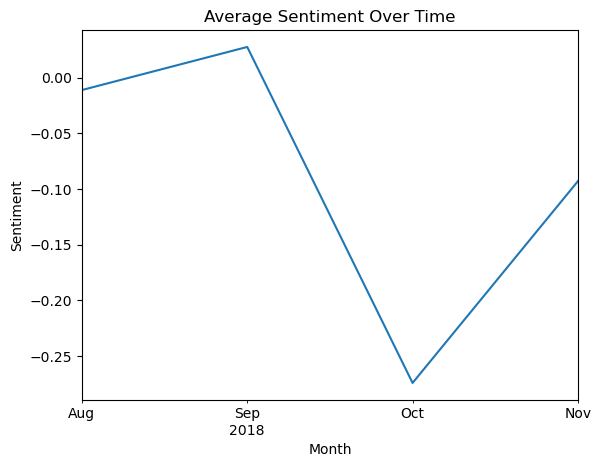

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

wildfire['date'] = pd.to_datetime(wildfire['timestamp'], unit='d', origin='1899-12-30')

wildfire.groupby(wildfire['date'].dt.to_period('M'))['sentiment'].mean().plot()
plt.title('Average Sentiment Over Time')
plt.ylabel('Sentiment')
plt.xlabel('Month')
plt.show()

## We have a lot of work to do but so far the results are promising. We see a clear change in sentinment at the begings of the 2018 CA wildfires. The sentiment analyzer seems accurate so far because the sentiment scores generally match the positive or negative tone of the comments when I read them. Below are texts with the highest and lowest sentments. They seem reasonable. Our next steps will be applying this code to differnt data sets. 

In [20]:
top_positive = wildfire.sort_values(by='sentiment', ascending=False).head(10)
for i, row in top_positive.iterrows():
    print(f"Sentiment: {row['sentiment']:.2f} | Text: {row['cleaned_text']}")

Sentiment: 0.99 | Text: I like say what a heroes save the dogs and maybe cats and you guys great and excellent service for people need help and helping any 4 legged friends from wildfire thank you save all them it funny you guys put some dogs in your police cars thank you asking smile
Sentiment: 0.97 | Text: Happy thanksgiving to everyone out there I hope that everyone is having fun with their loved ones and a plate or two full of food lol My heart and prayers go to all those affected by these wildfires in California I hope that those families are having a great thanksgiving
Sentiment: 0.97 | Text: thanks for checking in on me for listening for telling me about your world your day your minutia thanks for laughing with me in my mirth that runs like wildfire thanks for feeding me for the shelter of your love
Sentiment: 0.97 | Text: Thankful that rain has finally arrived to wipe away all our wildfire smoke Thankful to be sheltered from it eating great food with my incredible family Thankf

In [22]:
top_negative = wildfire.sort_values(by='sentiment', ascending=True).head(10)
for i, row in top_negative.iterrows():
    print(f"Sentiment: {row['sentiment']:.2f} | Text: {row['cleaned_text']}")

Sentiment: -0.98 | Text: 12 dead mass murder 23 dead counting in Paradise 2 dead countingLA Most of the dead found in their cars trying to escape Most devastating wildfire in CA history Millions struggling TO BREATHE You Rep House busy colluding w Russians in Paris skip Veteran Memorial
Sentiment: -0.97 | Text: Look at the 88 now confirmed dead 203 missing Whether or not you agree our enslavement to cars drives climate changefueled wildfires theres no doubt fireengulfed gridlock killed Our addiction to gasolinebased mobility was our death trap 4
Sentiment: -0.97 | Text: My stomach hurts every time a new shitty issue comes along yah every day High school shooting shit Another Climate change wildfire Shit Cut the endangered species act Shit Piss on strong car emissions Shit Sell national land for Oil and mining
Sentiment: -0.97 | Text: Saddened by the death of 42 people in California wildfire Apart from human casualty huge damage to Flora and Fauna is feared Dead in cars and homes Northe